In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as st
plt.style.use('fivethirtyeight')
import warnings

In [ ]:
!gdown --id '1U2sCgcdFKz1XEHgdlfxAwfYPvQtv2aof'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1U2sCgcdFKz1XEHgdlfxAwfYPvQtv2aof
To: /content/Sample - Superstore.xls
100% 3.36M/3.36M [00:00<00:00, 152MB/s]


In [ ]:
df = pd.read_excel('/content/Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# For now we are going with only Furniture type and else
Furniture = df[df['Category']=='Furniture']
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
#Check for time start and end of the date
Furniture['Order Date'].min(),Furniture['Order Date'].max()

#So the starting date is 06-01-2014 and it goes to 30-12-2017

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Preprocessing

In [ ]:
#Drop the unuseful columns
Furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

Furniture.drop(cols, axis=1, inplace=True)
Furniture.head()

<ipython-input-7-df13267ef8a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Furniture.drop(cols, axis=1, inplace=True)


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [ ]:
furniture = Furniture.sort_values(by='Order Date')
furniture.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [ ]:
#Check for null values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
#Group by the date for the sum of the total sale if any value accure more than 1 time
furniture = furniture.groupby(by = 'Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [ ]:
furniture.set_index('Order Date', inplace=True)
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
#It is hard to tackle the data as each date so we will change it into months period
furniture = furniture['Sales'].resample('MS').mean()
furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

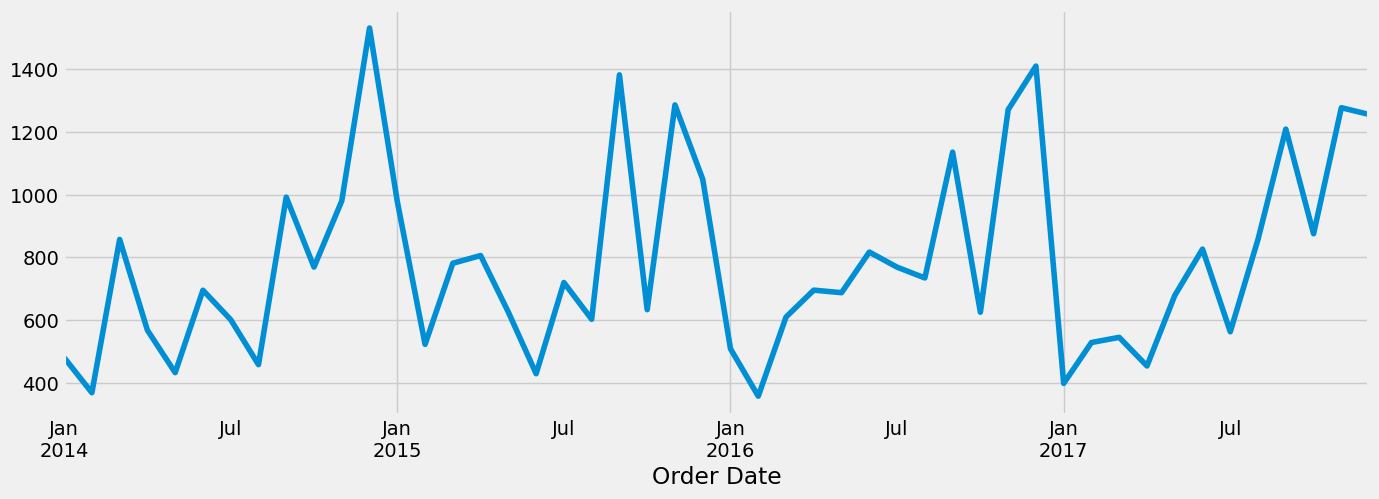

In [ ]:
furniture.plot(figsize=(15,5))
plt.show()

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

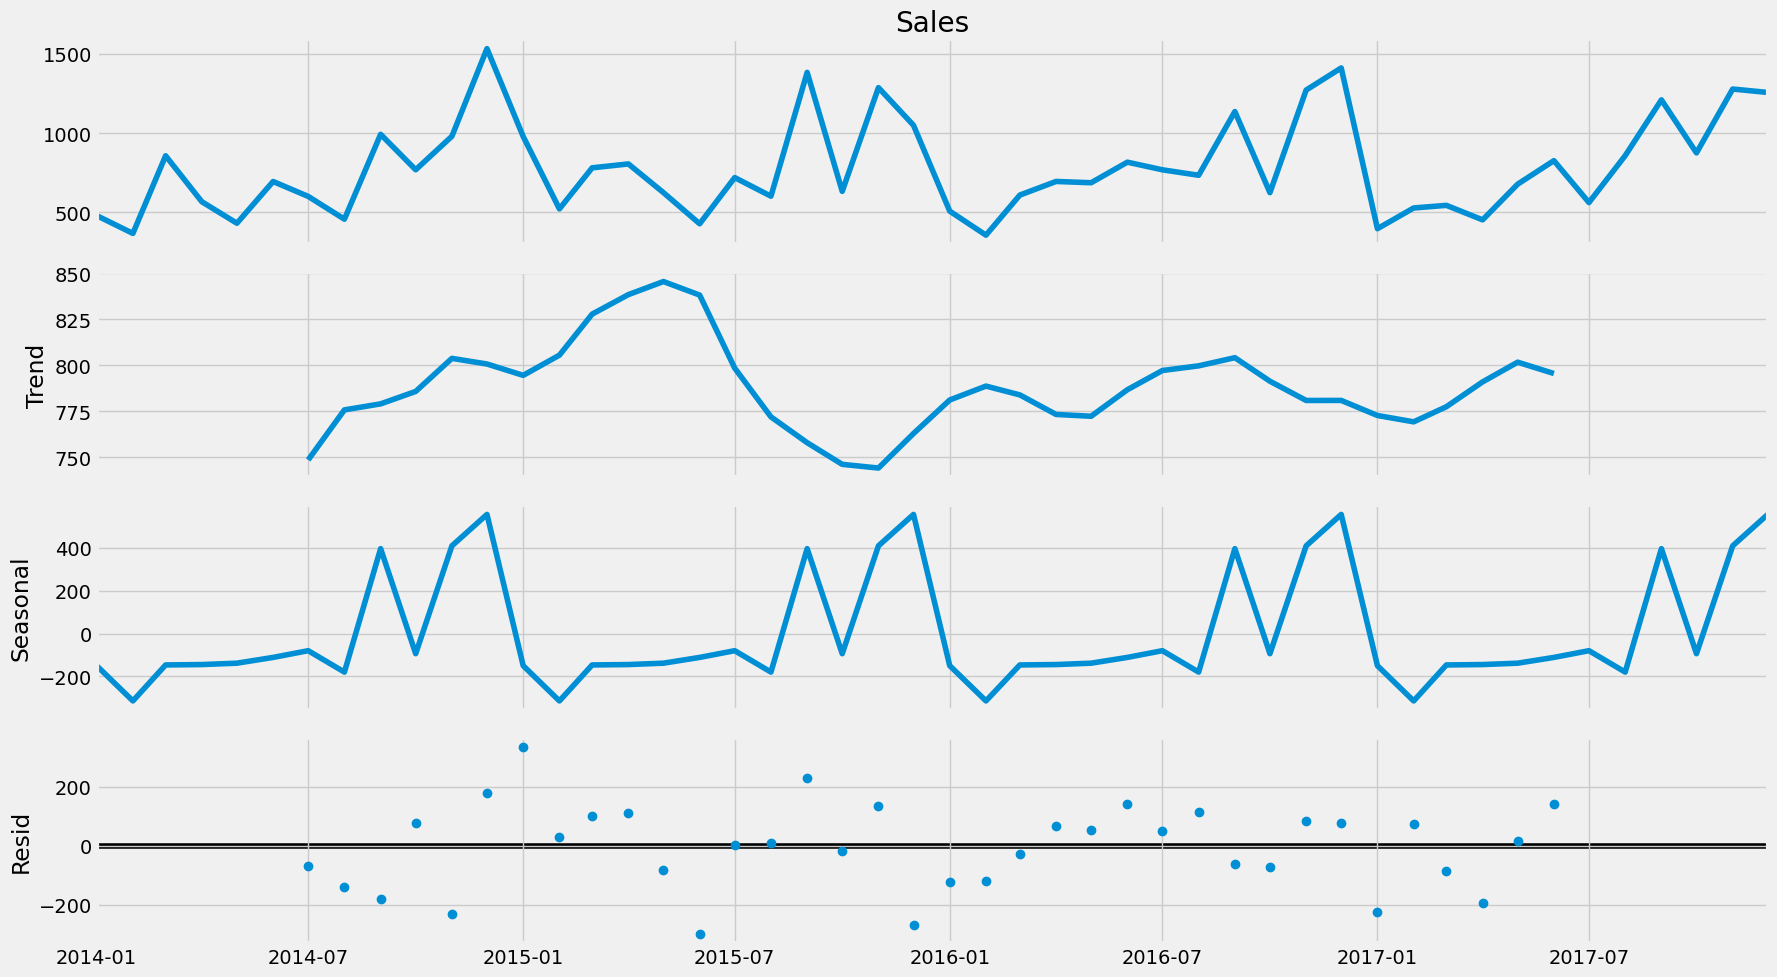

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,10
decompose = sm.tsa.seasonal_decompose(furniture, model='additive')
fig = decompose.plot()
plt.show()

In [ ]:
# Now we are going to select the ARIMA parameters and apply the ARIMA model
import itertools
p = d =q = range(0,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
# Now using the Grid Search CV to findout the optimal parameters
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(furniture, order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit()
      print("ARIMA {}x{} 12 - AIC:{}".format(param,param_seasonal,results.aic))
    except:
      continue

ARIMA (0, 0, 0)x(0, 0, 0, 12) 12 - AIC:769.0817523205915


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0)x(0, 0, 1, 12) 12 - AIC:1523.5085449297978
ARIMA (0, 0, 0)x(0, 1, 0, 12) 12 - AIC:477.7170130919703
ARIMA (0, 0, 0)x(0, 1, 1, 12) 12 - AIC:302.27028997935736
ARIMA (0, 0, 0)x(1, 0, 0, 12) 12 - AIC:497.2314433418338


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 0)x(1, 0, 1, 12) 12 - AIC:1317.1698862853953
ARIMA (0, 0, 0)x(1, 1, 0, 12) 12 - AIC:318.0047199116341
ARIMA (0, 0, 0)x(1, 1, 1, 12) 12 - AIC:304.24882803033336
ARIMA (0, 0, 1)x(0, 0, 0, 12) 12 - AIC:720.9252270758099


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1)x(0, 0, 1, 12) 12 - AIC:2715.646290524748
ARIMA (0, 0, 1)x(0, 1, 0, 12) 12 - AIC:466.56074298091517
ARIMA (0, 0, 1)x(0, 1, 1, 12) 12 - AIC:291.6261389673299


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1)x(1, 0, 0, 12) 12 - AIC:499.61482929923943


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1)x(1, 0, 1, 12) 12 - AIC:2505.9754087946067
ARIMA (0, 0, 1)x(1, 1, 0, 12) 12 - AIC:319.9884876946868


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 0, 1)x(1, 1, 1, 12) 12 - AIC:291.8725576437098
ARIMA (0, 1, 0)x(0, 0, 0, 12) 12 - AIC:677.8947668259312


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0)x(0, 0, 1, 12) 12 - AIC:1362.3338317546836
ARIMA (0, 1, 0)x(0, 1, 0, 12) 12 - AIC:486.6378567269187
ARIMA (0, 1, 0)x(0, 1, 1, 12) 12 - AIC:304.9671228167952
ARIMA (0, 1, 0)x(1, 0, 0, 12) 12 - AIC:497.78896630044073
ARIMA (0, 1, 0)x(1, 0, 1, 12) 12 - AIC:1412.7664345389687
ARIMA (0, 1, 0)x(1, 1, 0, 12) 12 - AIC:319.7714068109211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 0)x(1, 1, 1, 12) 12 - AIC:306.9113200151447
ARIMA (0, 1, 1)x(0, 0, 0, 12) 12 - AIC:649.9056176817271


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1)x(0, 0, 1, 12) 12 - AIC:1935.211583857393
ARIMA (0, 1, 1)x(0, 1, 0, 12) 12 - AIC:458.8705548482728
ARIMA (0, 1, 1)x(0, 1, 1, 12) 12 - AIC:279.5806233401351
ARIMA (0, 1, 1)x(1, 0, 0, 12) 12 - AIC:486.18329774427036


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1)x(1, 0, 1, 12) 12 - AIC:2561.1684419080807
ARIMA (0, 1, 1)x(1, 1, 0, 12) 12 - AIC:310.7574368417285


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (0, 1, 1)x(1, 1, 1, 12) 12 - AIC:281.55766214612555
ARIMA (1, 0, 0)x(0, 0, 0, 12) 12 - AIC:692.1645522067713


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0)x(0, 0, 1, 12) 12 - AIC:1755.6522415154225
ARIMA (1, 0, 0)x(0, 1, 0, 12) 12 - AIC:479.4632147852136
ARIMA (1, 0, 0)x(0, 1, 1, 12) 12 - AIC:304.20776751609657
ARIMA (1, 0, 0)x(1, 0, 0, 12) 12 - AIC:480.92593679351955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0)x(1, 0, 1, 12) 12 - AIC:1258.8183236593795
ARIMA (1, 0, 0)x(1, 1, 0, 12) 12 - AIC:304.46646750846116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 0)x(1, 1, 1, 12) 12 - AIC:304.5842692143826
ARIMA (1, 0, 1)x(0, 0, 0, 12) 12 - AIC:665.7794442185808


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1)x(0, 0, 1, 12) 12 - AIC:2529.2024607214953
ARIMA (1, 0, 1)x(0, 1, 0, 12) 12 - AIC:468.3685195814221


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1)x(0, 1, 1, 12) 12 - AIC:293.34221939659466
ARIMA (1, 0, 1)x(1, 0, 0, 12) 12 - AIC:482.5763323876698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1)x(1, 0, 1, 12) 12 - AIC:2439.064033652234
ARIMA (1, 0, 1)x(1, 1, 0, 12) 12 - AIC:306.0156002121446


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 0, 1)x(1, 1, 1, 12) 12 - AIC:293.75131881261973
ARIMA (1, 1, 0)x(0, 0, 0, 12) 12 - AIC:671.2513547541902


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0)x(0, 0, 1, 12) 12 - AIC:1610.3821137102082
ARIMA (1, 1, 0)x(0, 1, 0, 12) 12 - AIC:479.2003422281135
ARIMA (1, 1, 0)x(0, 1, 1, 12) 12 - AIC:300.2130611619097
ARIMA (1, 1, 0)x(1, 0, 0, 12) 12 - AIC:475.3403658784638
ARIMA (1, 1, 0)x(1, 0, 1, 12) 12 - AIC:1387.56288308395
ARIMA (1, 1, 0)x(1, 1, 0, 12) 12 - AIC:300.62709013454116


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 0)x(1, 1, 1, 12) 12 - AIC:302.3264992504886
ARIMA (1, 1, 1)x(0, 0, 0, 12) 12 - AIC:649.0318019834904


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1)x(0, 0, 1, 12) 12 - AIC:994.7614540992078
ARIMA (1, 1, 1)x(0, 1, 0, 12) 12 - AIC:460.476268760973
ARIMA (1, 1, 1)x(0, 1, 1, 12) 12 - AIC:281.3873006939371
ARIMA (1, 1, 1)x(1, 0, 0, 12) 12 - AIC:469.52503546609034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1)x(1, 0, 1, 12) 12 - AIC:1397.0112715545645
ARIMA (1, 1, 1)x(1, 1, 0, 12) 12 - AIC:297.7875439538356


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA (1, 1, 1)x(1, 1, 1, 12) 12 - AIC:283.36610144801216


In [ ]:
mod = sm.tsa.statespace.SARIMAX(furniture,
                                order = (0, 1, 1),
                                seasonal_order = (0, 1, 1, 12),
                                enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   1062.032     -0.001      0.999   -2082.544    2080.544
ma.S.L12      -1.0001   1062.097     -0.001      0.999   -2082.672    2080.672
sigma2      2.686e+04      0.002   1.51e+07      0.000    2.69e+04    2.69e+04


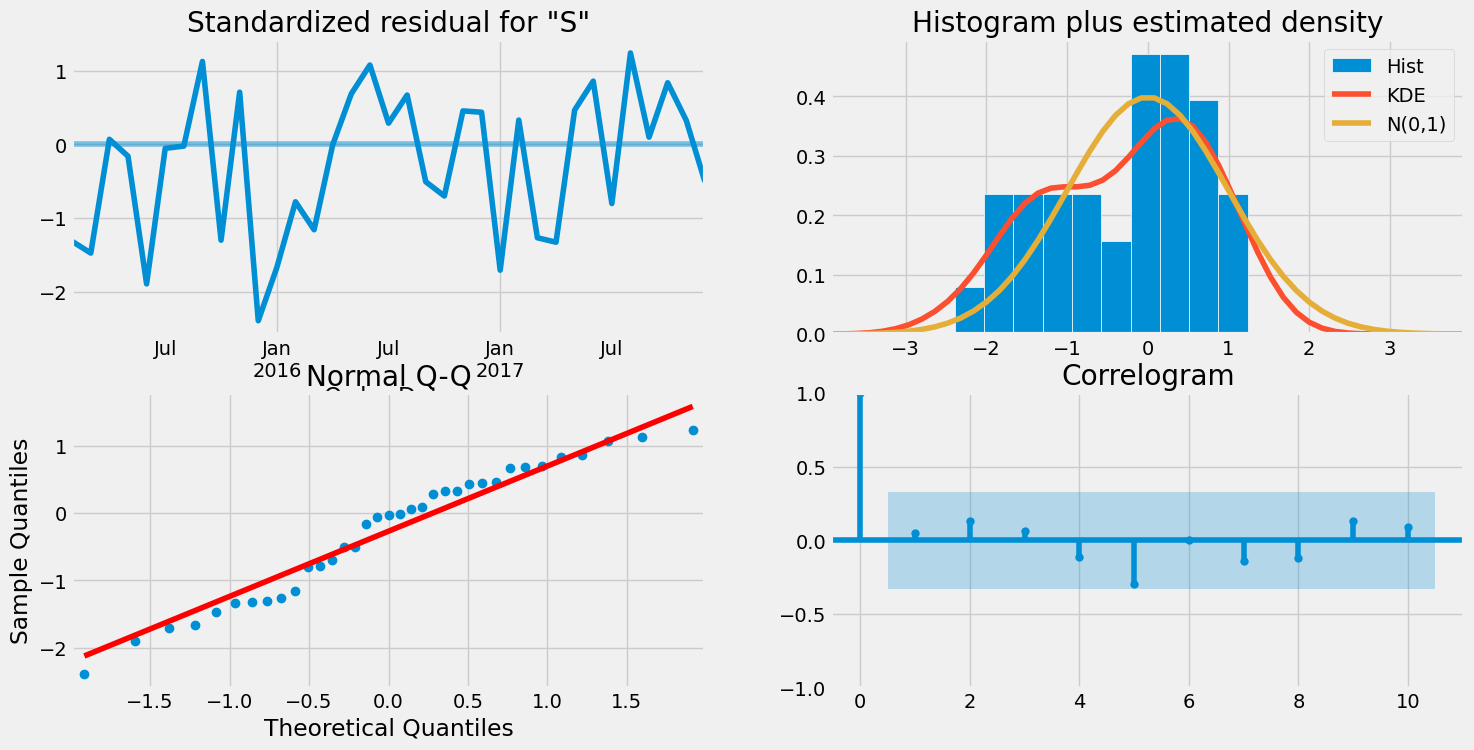

In [ ]:
results.plot_diagnostics(figsize = (16,8))
plt.show()

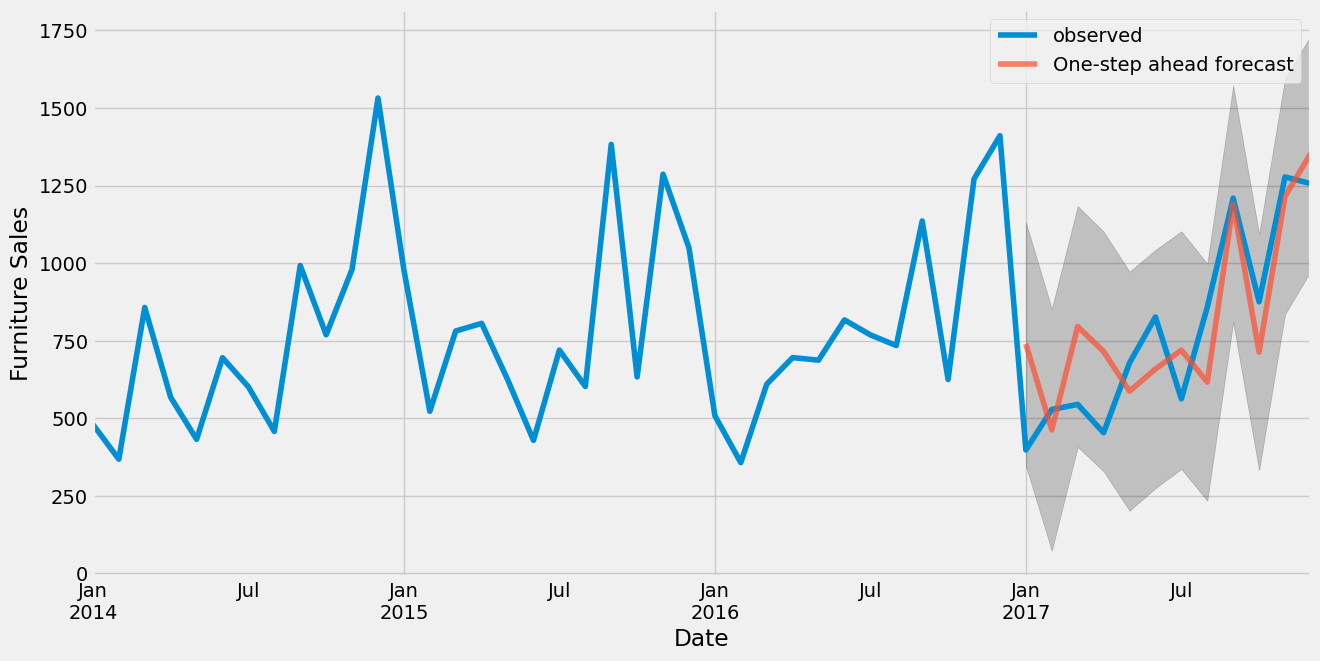

In [ ]:
#Now let's predict the price
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'),
                              dynamic = False)
pred_ci = pred.conf_int()
ax= furniture['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label= 'One-step ahead forecast',
                          alpha = 0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = furniture['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34370.12


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 185.39


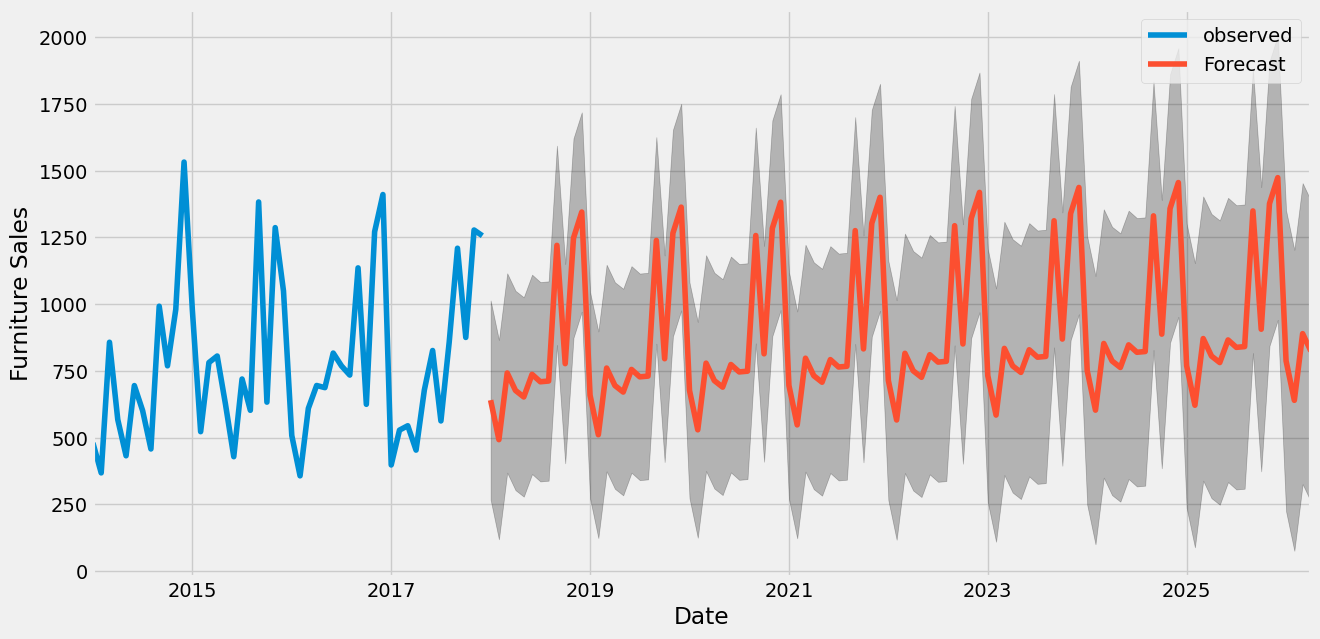

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = furniture.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

## Time Series of Furniture vs. Office Supplies

In [ ]:
furniture = df[df['Category'] == 'Furniture']
office_supplies = df[df['Category'] == 'Office Supplies']
furniture.shape, office_supplies.shape

((2121, 21), (6026, 21))

In [ ]:
# First of all we need to get the main columns that we are going to use
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
office_supplies.drop(cols, axis=1, inplace=True)

<ipython-input-29-f2b5c179d803>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols, axis=1, inplace=True)
<ipython-input-29-f2b5c179d803>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_supplies.drop(cols, axis=1, inplace=True)


In [ ]:
#Sorting the values by oder date
furniture = furniture.sort_values('Order Date')
office_supplies = office_supplies.sort_values('Order Date')

In [ ]:
#Grouping the sum of the sales
furniture = furniture.groupby(by= 'Order Date')['Sales'].sum().reset_index()
office_supplies = office_supplies.groupby(by= 'Order Date')['Sales'].sum().reset_index()

In [ ]:
#Set the Order Date column as index
furniture = furniture.set_index('Order Date')
office_supplies = office_supplies.set_index('Order Date')


In [ ]:
furniture, office_supplies

(                Sales
 Order Date           
 2014-01-06  2573.8200
 2014-01-07    76.7280
 2014-01-10    51.9400
 2014-01-11     9.9400
 2014-01-13   879.9390
 ...               ...
 2017-12-24  1393.4940
 2017-12-25   832.4540
 2017-12-28   551.2568
 2017-12-29  2330.7180
 2017-12-30   323.1360
 
 [889 rows x 1 columns],
                Sales
 Order Date          
 2014-01-03    16.448
 2014-01-04   288.060
 2014-01-05    19.536
 2014-01-06   685.340
 2014-01-07    10.430
 ...              ...
 2017-12-26   814.594
 2017-12-27    13.248
 2017-12-28  1091.244
 2017-12-29   282.440
 2017-12-30   299.724
 
 [1148 rows x 1 columns])

In [ ]:
# Resample the sales values
furniture = furniture['Sales'].resample('MS').mean()
office_supplies = office_supplies['Sales'].resample('MS').mean()
furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [ ]:
# Making it into a dataframe
furniture_1 = pd.DataFrame({'Order Date': furniture.index,
                            'Sales': furniture.values})
office_1 = pd.DataFrame({'Order Date': office_supplies.index,
                         'Sales': office_supplies.values})

In [ ]:
# Merging these two dataframes for comparizen
store = furniture_1.merge(office_1, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


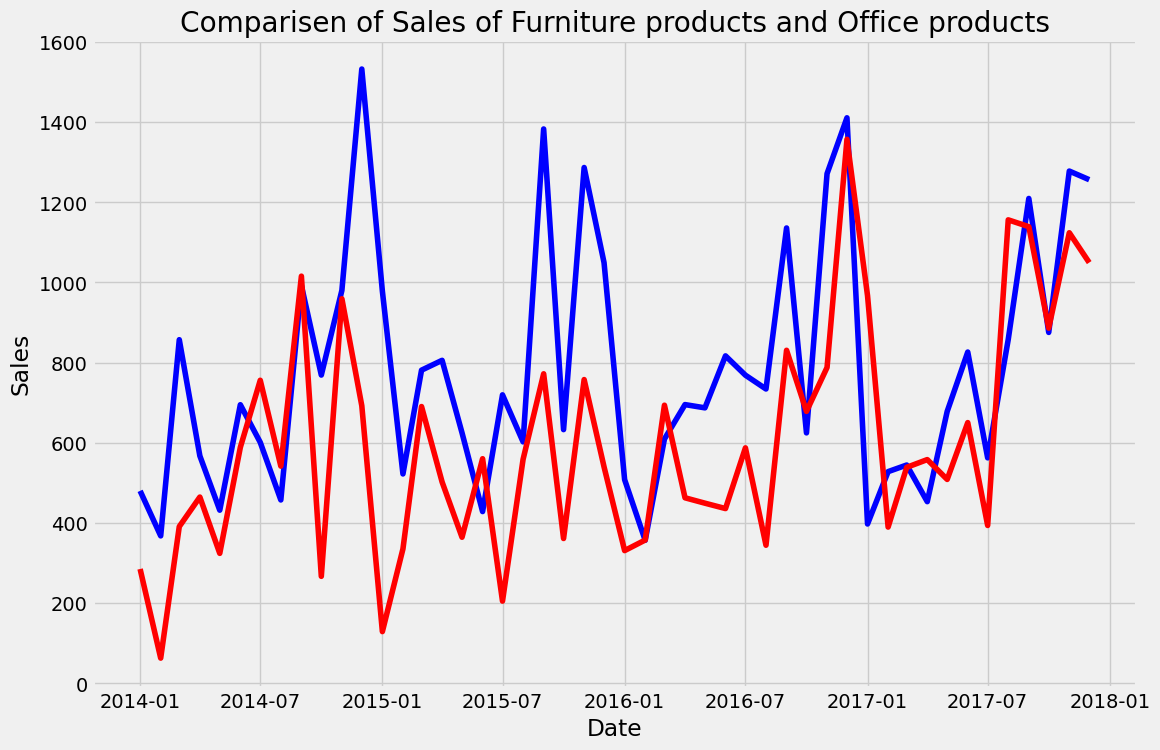

In [ ]:
#Ploting the comparisen
plt.figure(figsize=(12,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b', label= 'Furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r', label= 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Comparisen of Sales of Furniture products and Office products")
plt.show()

In [ ]:
!pip install prophet --no-binary :all

In [ ]:
# Now we are going to use the Prophet algorithm for sales forcasting
!conda install -c conda-forge fbprophet -y

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
from fbprophet import Prophet

ModuleNotFoundError: ignored